<a href="https://colab.research.google.com/github/ChhaSahil/Cust_Churn_Prediction/blob/main/Customer_churn_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<ipython-input-13-4d7dec473b71>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap = 'YlGnBu')


<Axes: >

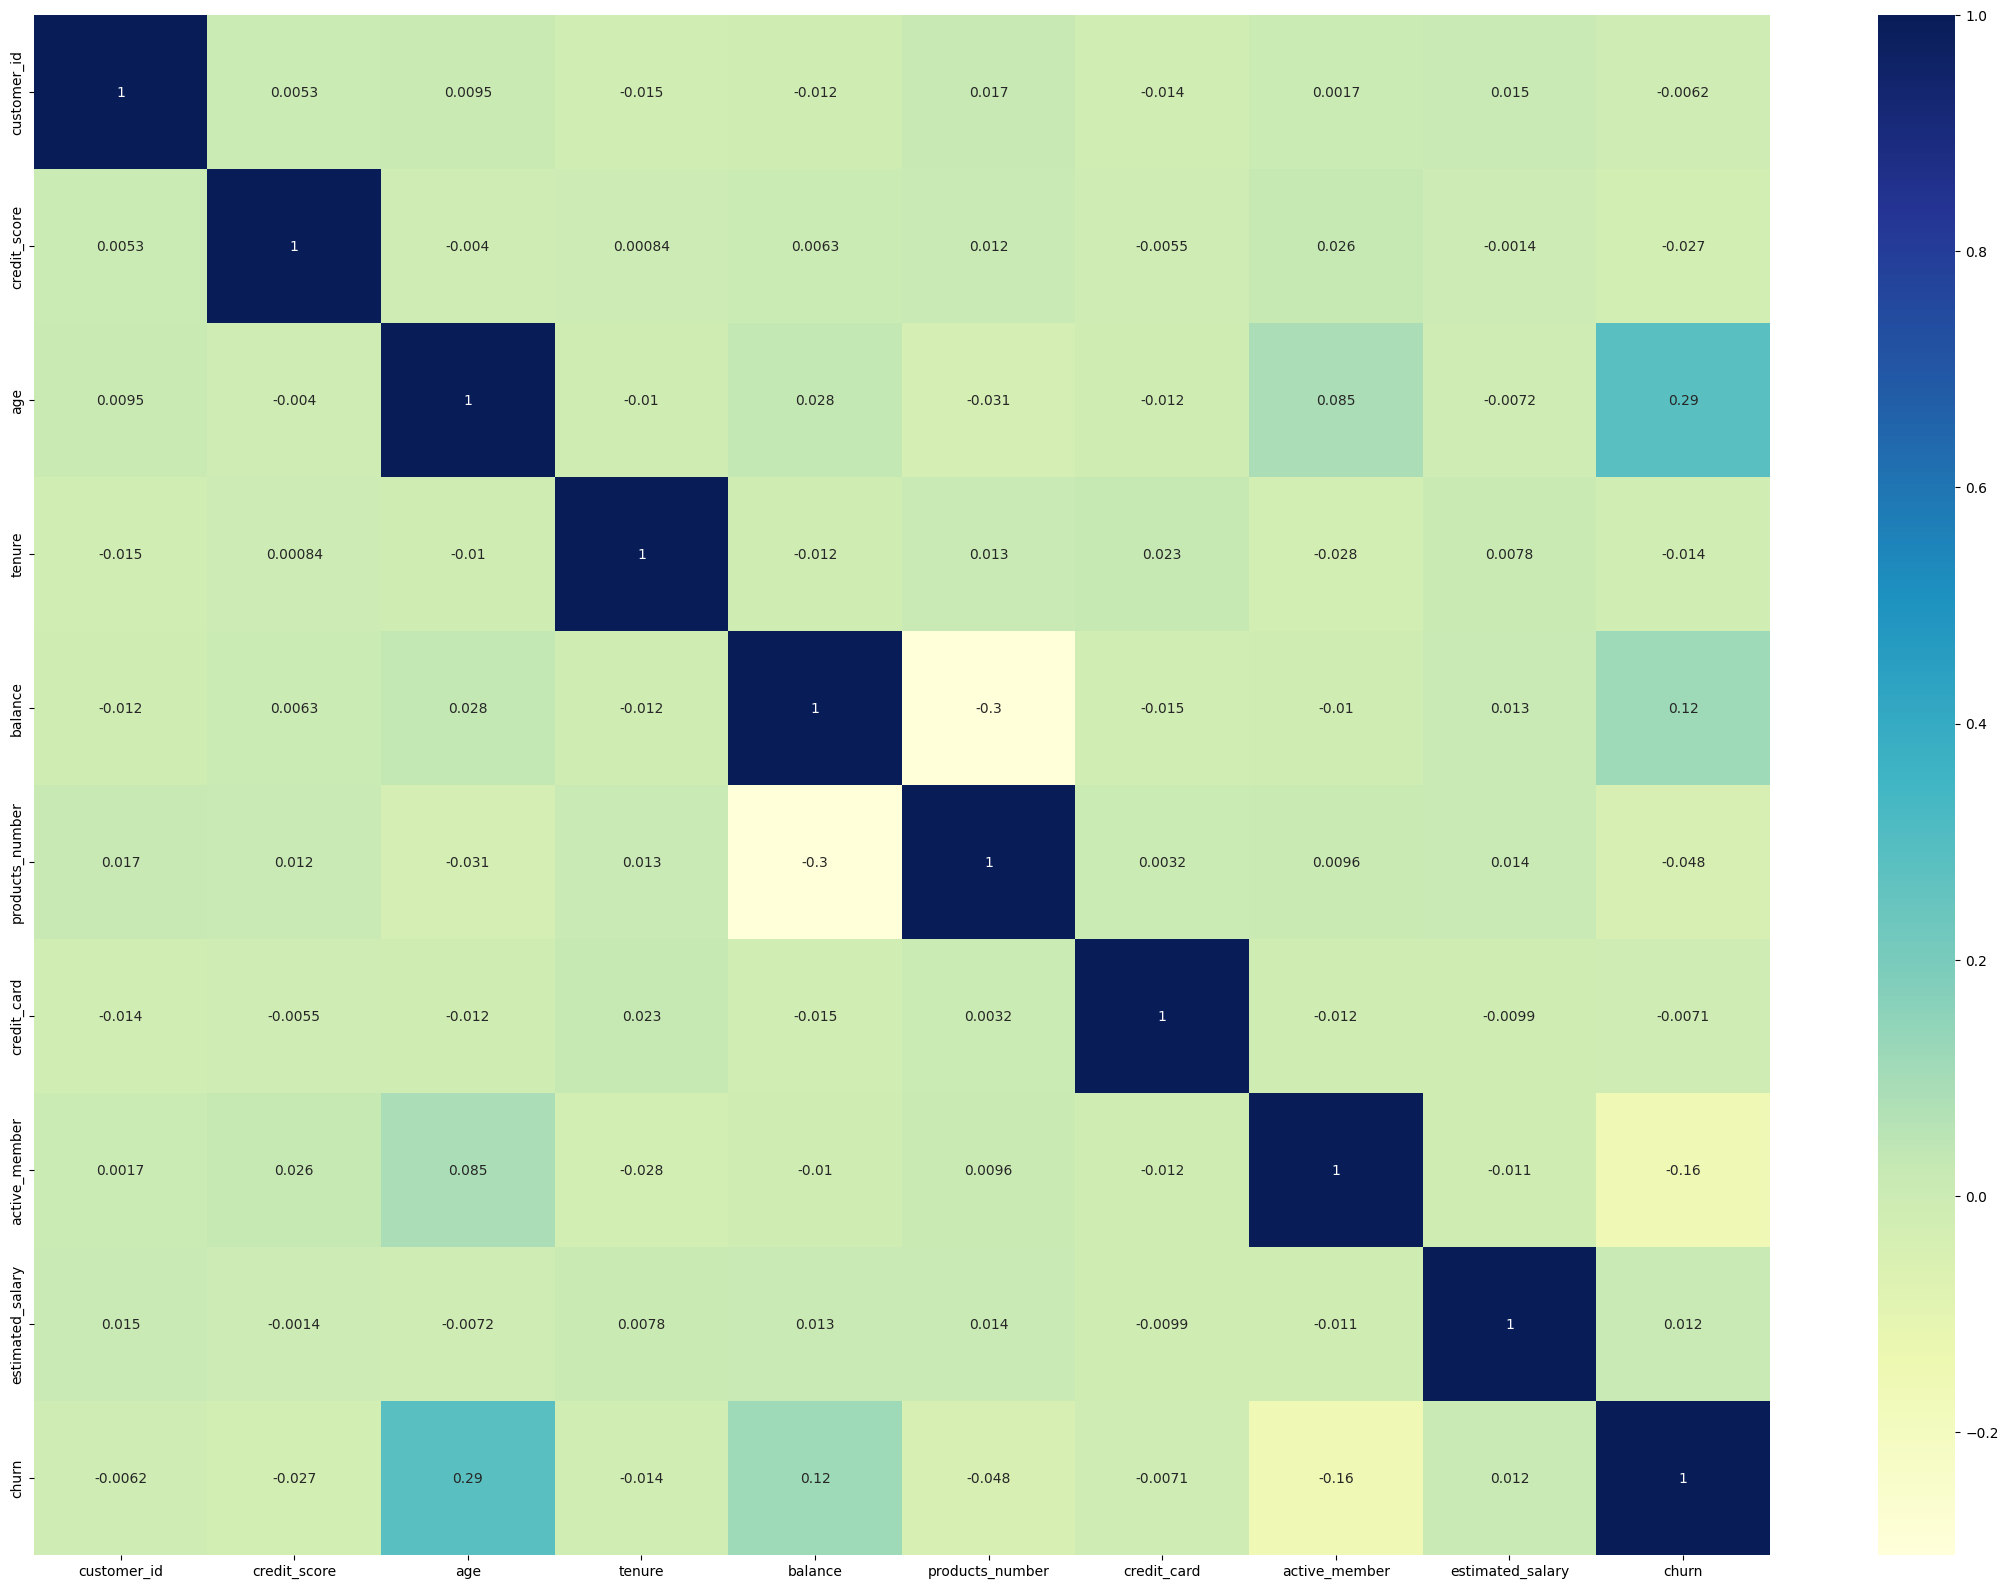

In [ ]:
plt.figure(figsize = (28,20))
sns.heatmap(df.corr(),annot = True,cmap = 'YlGnBu')

In [ ]:
from scipy import stats

Text(0.5, 1.0, 'Number of Churned vs Non Churned Customers')

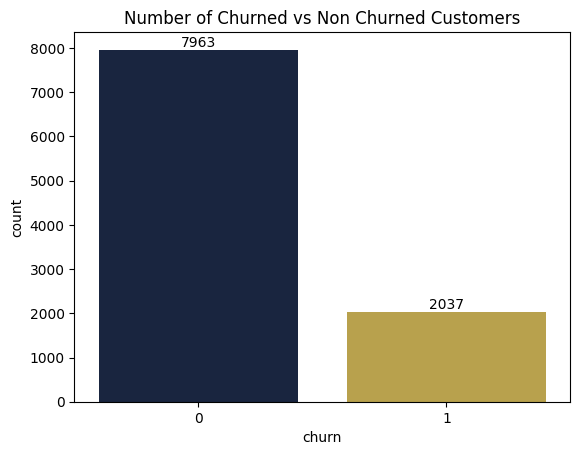

In [ ]:
ax = sns.countplot(data= df,x=df.churn,palette=['#132345',"#CAAB3B"])
for labels in ax.containers:
  ax.bar_label(labels)
plt.title('Number of Churned vs Non Churned Customers')

In [ ]:
data_churn = df[df['churn']==1]
data_nc = df[df['churn']==0]

In [ ]:
def plot_pdf(df,x,ax,xlabel,title,color):
  data = df[x]
  loc = data.mean()
  scale = data.std()
  pdf = stats.norm.pdf(data,loc=loc,scale=scale)

  sns.lineplot(x=data,y = pdf,color = color, ax=ax)
  ax.set_facecolor('black')
  ax.grid(which = 'major', linewidth = '0.2', color = 'white')
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Probability Density')

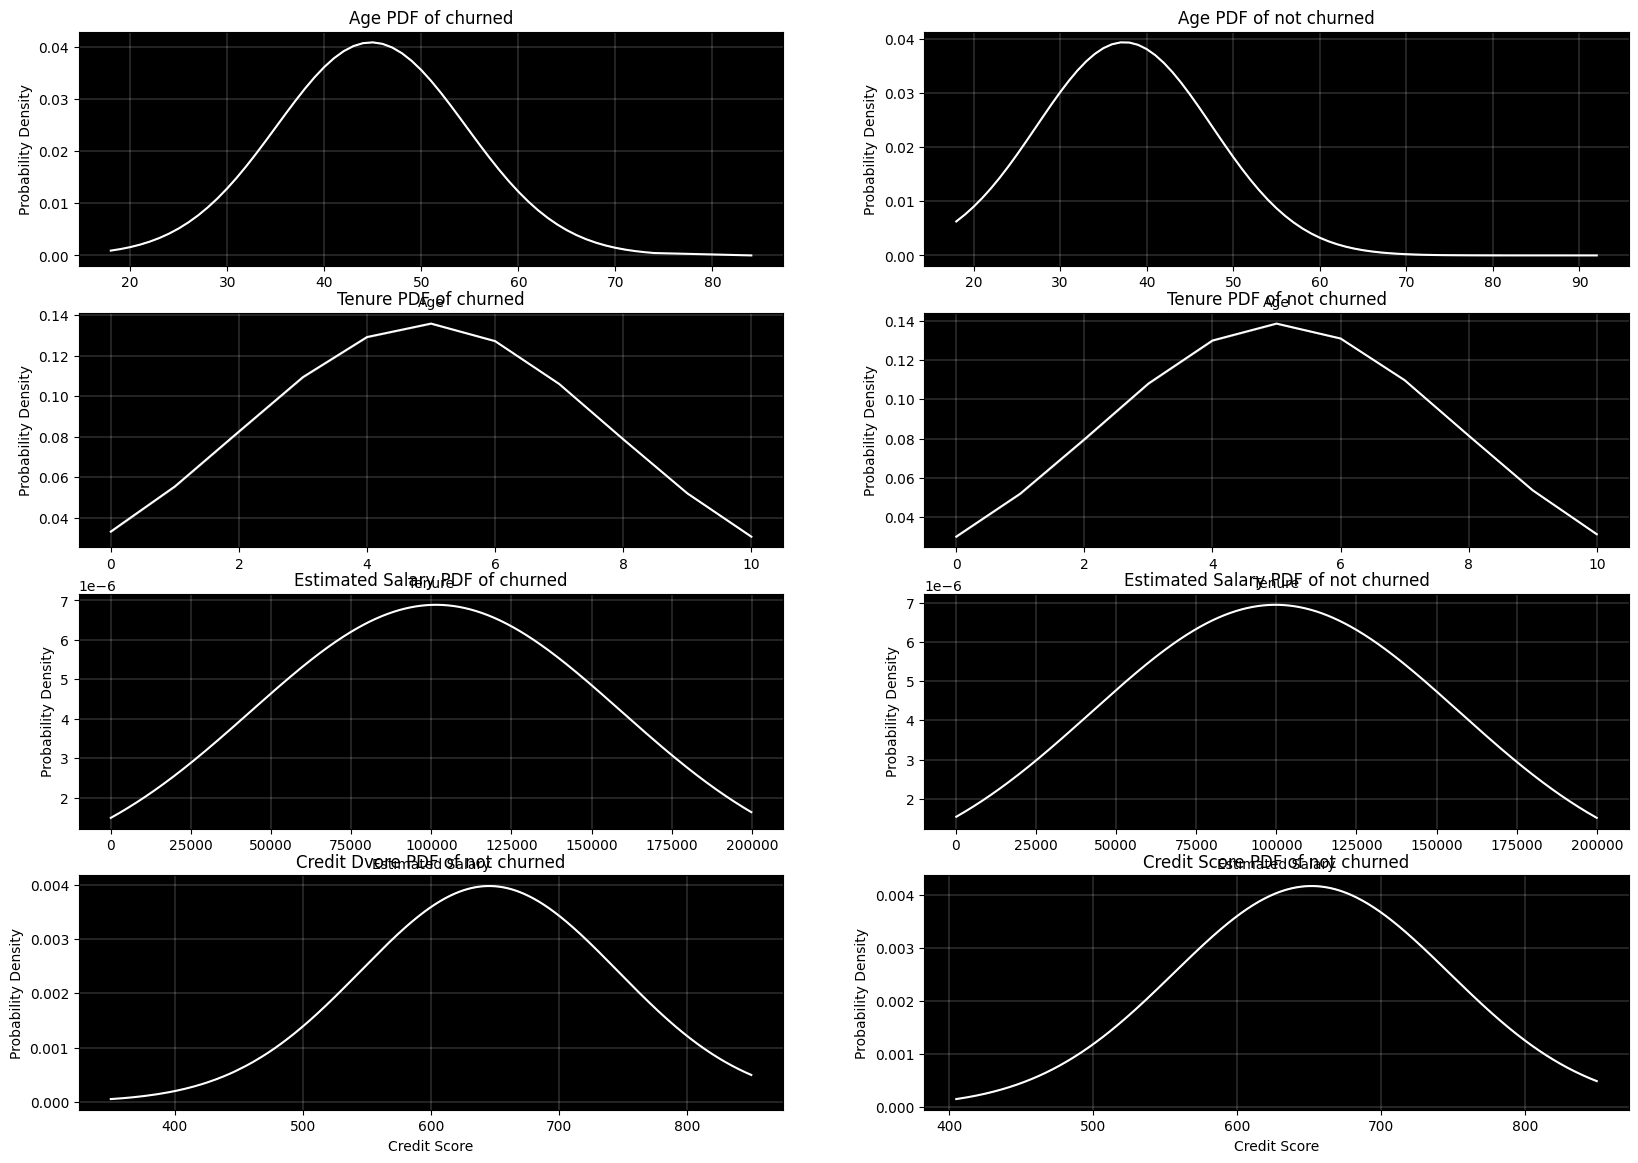

In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize = (20,14))

plot_pdf(data_churn,'age',ax1,'Age','Age PDF of churned','white')
plot_pdf(data_nc,'age',ax2,'Age','Age PDF of not churned','white')
plot_pdf(data_churn,'tenure',ax3,'Tenure','Tenure PDF of churned','white')
plot_pdf(data_nc,'tenure',ax4,'Tenure','Tenure PDF of not churned','white')
plot_pdf(data_churn,'estimated_salary',ax5,'Estimated Salary','Estimated Salary PDF of churned','white')
plot_pdf(data_nc,'estimated_salary',ax6,'Estimated Salary','Estimated Salary PDF of not churned','white')
plot_pdf(data_churn,'credit_score',ax7,'Credit Score','Credit Dvore PDF of not churned','white')
plot_pdf(data_nc,'credit_score',ax8,'Credit Score','Credit Score PDF of not churned','white')


In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

data_grouped = df[['country','churn']].groupby(['country']).sum()

In [ ]:
data_grouped

,churn
country,
France,810
Germany,814
Spain,413


Text(0.5, 1.0, 'Number of Churned vs Non Churned Customers Country Wise')

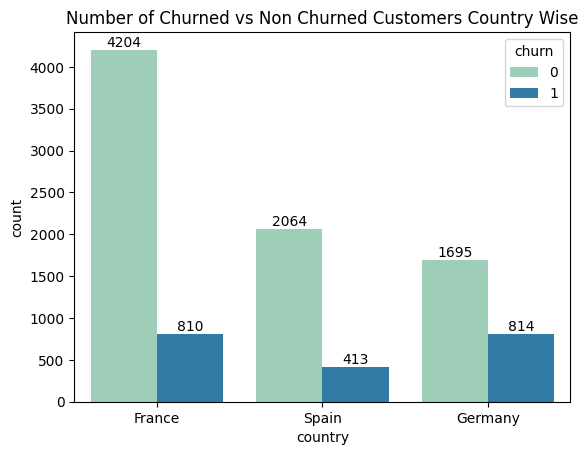

In [ ]:
ax = sns.countplot(data= df,x=df.country,hue = df.churn,palette='YlGnBu')
for labels in ax.containers:
  ax.bar_label(labels)
plt.title('Number of Churned vs Non Churned Customers Country Wise')

Text(0.5, 1.0, 'Male vs Female Churn Rate Country-Wise')

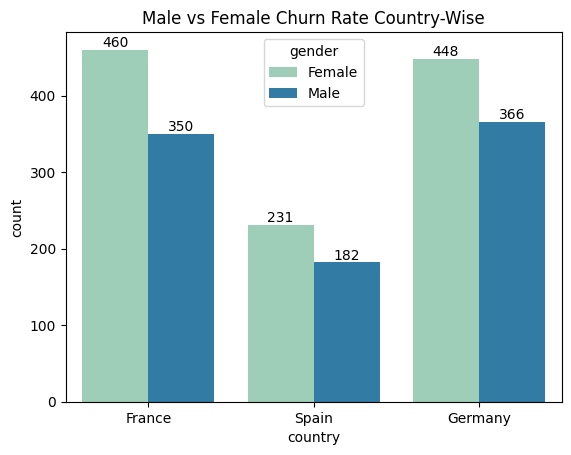

In [ ]:
ax = sns.countplot(data= data_churn,x=data_churn.country,hue = data_churn.gender,palette='YlGnBu')
for labels in ax.containers:
  ax.bar_label(labels)
plt.title('Male vs Female Churn Rate Country-Wise')

Text(0.5, 1.0, 'Number of Churned vs Non Churned Customers Country Wise')

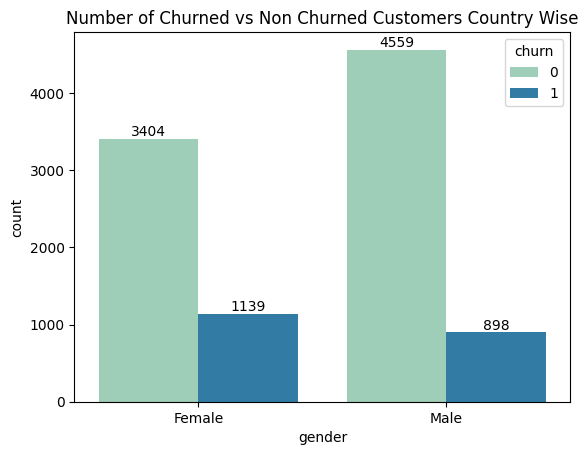

In [ ]:
ax = sns.countplot(data= df,x=df.gender,hue = df.churn,palette='YlGnBu')
for labels in ax.containers:
  ax.bar_label(labels)
plt.title('Number of Churned vs Non Churned Customers Country Wise')

Text(0.5, 1.0, 'Male vs Female Churn Rate according to credit card holder')

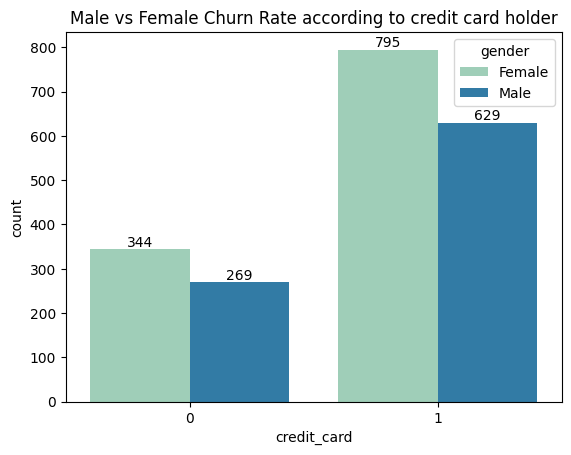

In [ ]:
ax = sns.countplot(data= data_churn,x=data_churn.credit_card,hue = data_churn.gender,palette='YlGnBu')
for labels in ax.containers:
  ax.bar_label(labels)
plt.title('Male vs Female Churn Rate according to credit card holder')

Text(0.5, 1.0, 'Male vs Female Churn Rate according to Product taken from Bank')

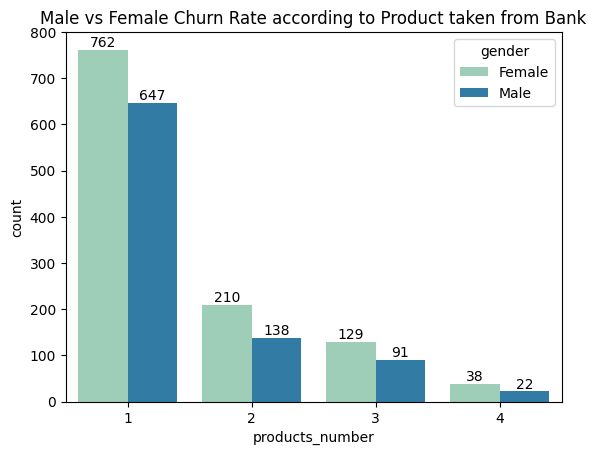

In [ ]:
ax = sns.countplot(data= data_churn,x=data_churn.products_number,hue = data_churn.gender,palette='YlGnBu')
for labels in ax.containers:
  ax.bar_label(labels)
plt.title('Male vs Female Churn Rate according to Product taken from Bank')

Text(0.5, 1.0, 'Male vs Female Churn Rate according to Product taken from Bank')

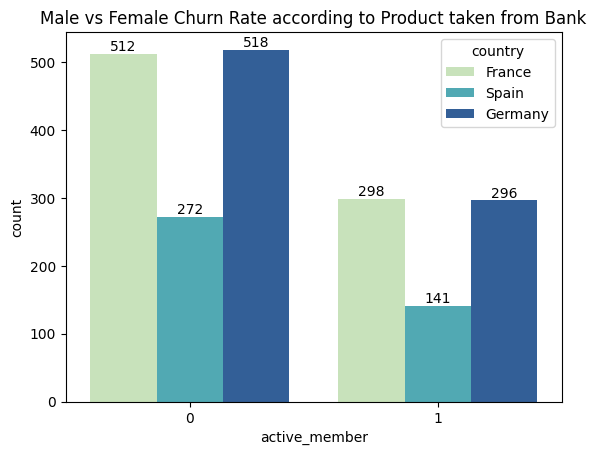

In [ ]:

ax = sns.countplot(data= data_churn,x=data_churn.active_member,hue = data_churn.country,palette='YlGnBu')
for labels in ax.containers:
  ax.bar_label(labels)
plt.title('Male vs Female Churn Rate according to Product taken from Bank')

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.duplicated(keep=False).sum()

0

In [ ]:
import plotly.graph_objects as go

In [ ]:
data_churn.estimated_salary.mean()

101465.67753068237

In [ ]:

data_grouped = df[['churn','estimated_salary','balance']].groupby(['churn'],as_index = False).mean()

In [ ]:
data_grouped

,churn,estimated_salary,balance
0,0,99738.391772,72745.296779
1,1,101465.677531,91108.539337


Text(0.5, 1.0, 'Estimated Salary Comparision')

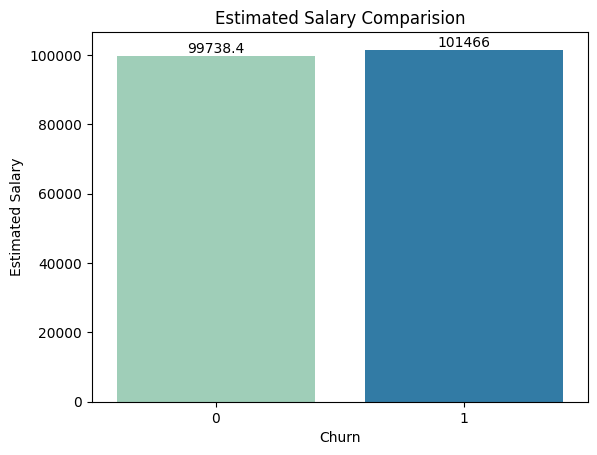

In [ ]:

ax = sns.barplot(data=data_grouped,x='churn',y = 'estimated_salary',palette = 'YlGnBu')
for label in ax.containers:
  ax.bar_label(label)
plt.xlabel('Churn')
plt.ylabel('Estimated Salary')
plt.title('Estimated Salary Comparision')

Text(0.5, 1.0, 'Balance Comparision')

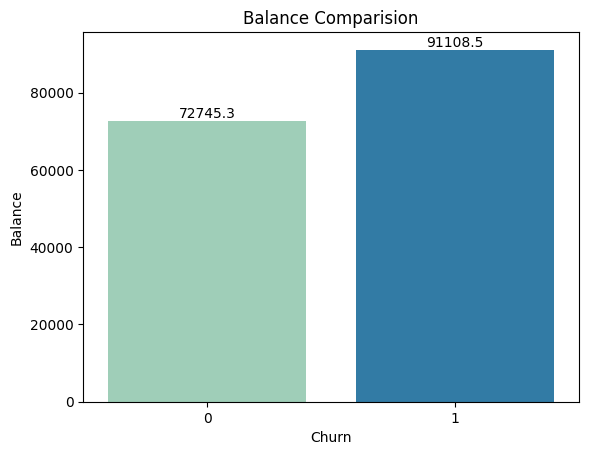

In [ ]:
ax = sns.barplot(data=data_grouped,x='churn',y = 'balance',palette = 'YlGnBu')
for label in ax.containers:
  ax.bar_label(label)
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.title('Balance Comparision')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['country'] = label_encoder.fit_transform(df['country'])
df['gender'] = label_encoder.fit_transform(df['gender'])

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

customer_id           int64
credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
df.drop(['customer_id'],axis = 1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['churn'],axis=1)
y = df.churn

In [ ]:
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2390
           1       0.48      0.50      0.49       610

    accuracy                           0.79      3000
   macro avg       0.67      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000



<Axes: >

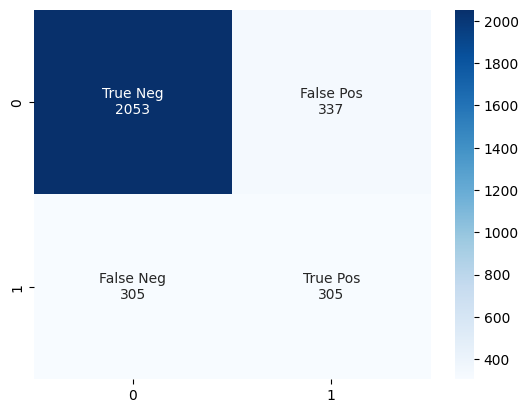

In [ ]:
cf_matrix = confusion_matrix(y_test,pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
pred_rfc = rf_classifier.predict(X_test)

In [ ]:

print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2390
           1       0.76      0.45      0.56       610

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



<Axes: >

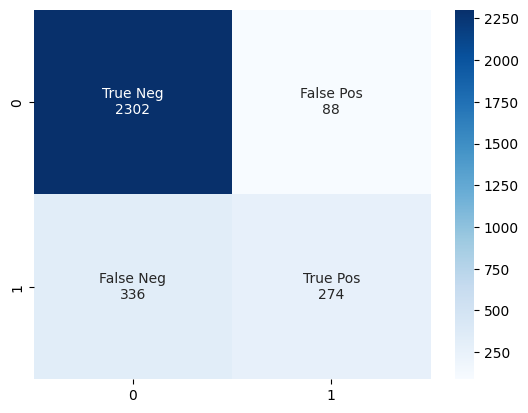

In [ ]:
cf_matrix = confusion_matrix(y_test,pred_rfc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2390
           1       0.00      0.00      0.00       610

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

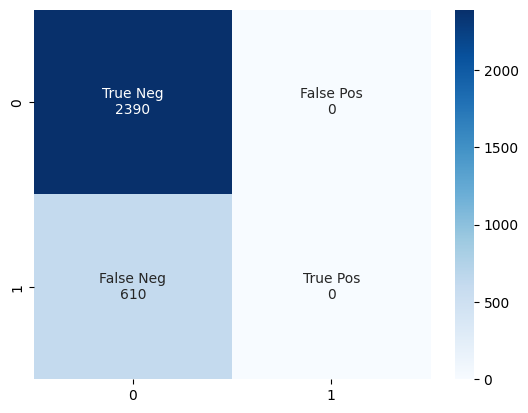

In [ ]:


cf_matrix = confusion_matrix(y_test,pred_svm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
pred_xgbc = xgbc.predict(X_test)
print(classification_report(y_test,pred_xgbc))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2390
           1       0.71      0.49      0.58       610

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.75      3000
weighted avg       0.84      0.85      0.84      3000



<Axes: >

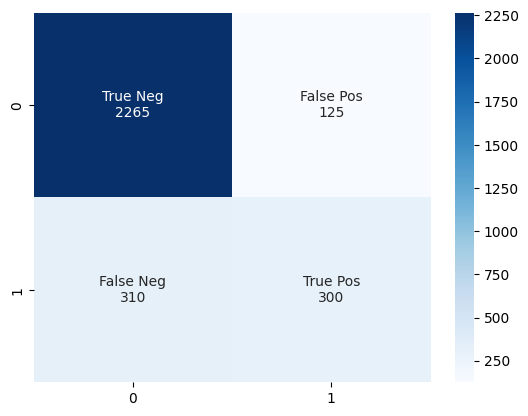

In [ ]:

cf_matrix = confusion_matrix(y_test,pred_xgbc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [ ]:

print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2390
           1       0.39      0.06      0.11       610

    accuracy                           0.79      3000
   macro avg       0.59      0.52      0.50      3000
weighted avg       0.72      0.79      0.72      3000



In [ ]:
cf_matrix = confusion_matrix(y_test,pred_lr)

<Axes: >

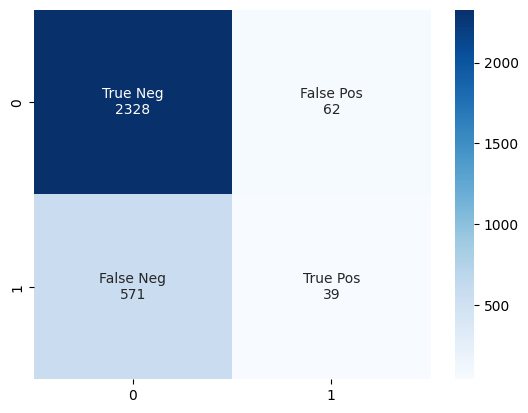

In [ ]:


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Let's See whether more data processing can increase our accuracy or not

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
dtree.fit(X_train_sc,y_train)
pred_dt_sc = dtree.predict(X_test_sc)
print(classification_report(y_test,pred_dt_sc))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2390
           1       0.48      0.49      0.49       610

    accuracy                           0.79      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000



In [ ]:
cohen_kappa_score(y_test,pred_dt_sc)

0.3538486665260264

In [ ]:
rf_classifier.fit(X_train_sc,y_train)
pred_rfc_sc = rf_classifier.predict(X_test_sc)
print(classification_report(y_test,pred_rfc_sc))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2390
           1       0.74      0.46      0.57       610

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



In [ ]:
cohen_kappa_score(y_test,pred_rfc_sc)

0.49249920204277053

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train_sc,y_train)
pred_svm_sc = svm.predict(X_test_sc)
print(classification_report(y_test,pred_svm_sc))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2390
           1       0.82      0.37      0.51       610

    accuracy                           0.85      3000
   macro avg       0.84      0.67      0.71      3000
weighted avg       0.85      0.85      0.83      3000



In [ ]:

cohen_kappa_score(y_test,pred_svm_sc)

0.43737874541927146

In [ ]:
xgbc.fit(X_train_sc,y_train)
pred_xgbc_sc = xgbc.predict(X_test_sc)
print(classification_report(y_test,pred_xgbc_sc))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2390
           1       0.71      0.49      0.58       610

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.75      3000
weighted avg       0.84      0.85      0.84      3000



In [ ]:
cohen_kappa_score(y_test,pred_xgbc_sc)

0.49545718151942786

In [ ]:
lr.fit(X_train_sc,y_train)
pred_lr_sc = lr.predict(X_test_sc)
print(classification_report(y_test,pred_lr_sc))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2390
           1       0.58      0.18      0.28       610

    accuracy                           0.81      3000
   macro avg       0.70      0.57      0.58      3000
weighted avg       0.77      0.81      0.76      3000



In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 3)

In [ ]:
X_train_psc = pca.fit_transform(X_train_sc)

In [ ]:

X_test_psc = pca.transform(X_test_sc)

In [ ]:
rf_classifier.fit(X_train_psc,y_train)
pred_rfc_psc = rf_classifier.predict(X_test_psc)
print(classification_report(y_test,pred_rfc_psc))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2390
           1       0.47      0.13      0.21       610

    accuracy                           0.79      3000
   macro avg       0.64      0.55      0.54      3000
weighted avg       0.74      0.79      0.74      3000



In [ ]:
xgbc.fit(X_train_psc,y_train)
pred_xgbc_psc = xgbc.predict(X_test_psc)
print(classification_report(y_test,pred_xgbc_psc))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2390
           1       0.45      0.13      0.20       610

    accuracy                           0.79      3000
   macro avg       0.63      0.54      0.54      3000
weighted avg       0.74      0.79      0.74      3000



Hence PCA fails

In [ ]:
X_train

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1309,591,2,1,30,8,124857.69,2,0,0,50485.70
8016,569,2,1,41,2,0.00,2,1,0,134272.57
2795,515,0,0,25,7,79543.59,1,0,1,38772.82
9227,776,0,0,31,5,0.00,2,1,0,92647.94
7094,640,0,0,67,3,0.00,1,0,1,42964.63
...,...,...,...,...,...,...,...,...,...,...
7839,566,0,0,21,3,0.00,2,1,1,3626.47
3603,750,0,0,47,7,121376.15,2,1,0,54473.60
5959,719,2,0,33,7,0.00,2,1,0,20016.59
5426,636,2,0,36,1,0.00,1,1,0,43134.58


In [ ]:
feature_names = list(X_train.columns)

In [ ]:
def plot_importances(model,model_name,features_to_plot,feature_name):
  model.fit(X_train_sc,y_train)
  importances = model.feature_importances_

  indices = np.argsort(importances)
  best_features = np.array(feature_names)[indices][-features_to_plot:]
  values = importances[indices][-features_to_plot:]

  y_ticks = np.arange(0, features_to_plot)
  fig, ax = plt.subplots()
  ax.barh(y_ticks, values, color = '#b2c4cc')
  ax.set_yticklabels(best_features)
  ax.set_yticks(y_ticks)
  ax.set_title("%s Feature Importances"%(model_name))
  fig.tight_layout()
  plt.show()
def best_features(model, features_to_plot, feature_names):
    # get list of best features
    model.fit(X,y)
    importances = model.feature_importances_

    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    return best_features

<ipython-input-87-30172c85c0a8>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(best_features)


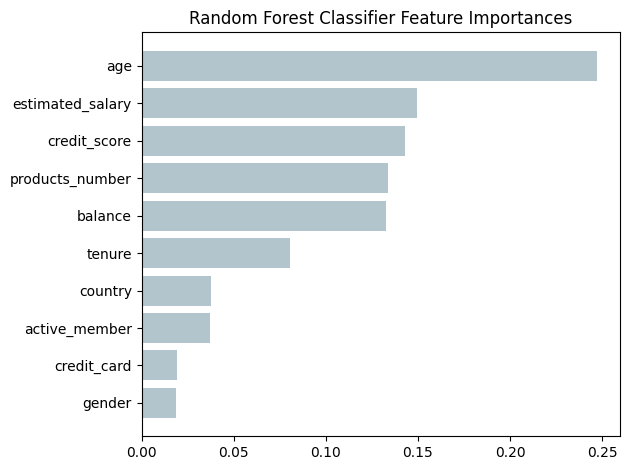

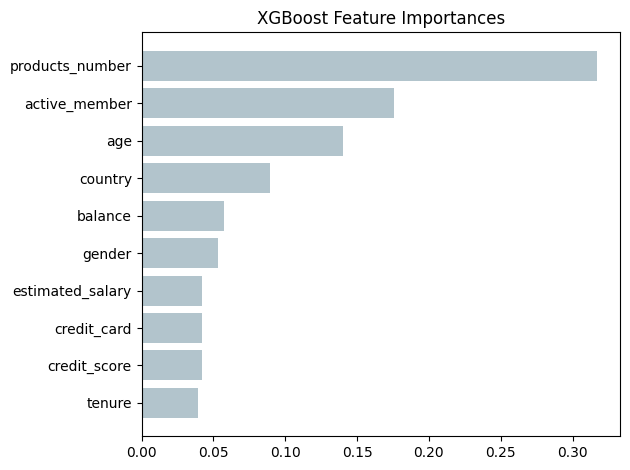

In [ ]:
plot_importances(rf_classifier,'Random Forest Classifier',10,feature_names)
plot_importances(xgbc,'XGBoost',10,feature_names)

In [ ]:
X_train2 = X_train[['products_number','active_member','age','country','balance']]
X_test2 = X_test[['products_number','active_member','age','country','balance']]

In [ ]:
X_train2_sc = sc.fit_transform(X_train2)
X_test2_sc = sc.transform(X_test2)

In [ ]:

xgbc.fit(X_train2_sc,y_train)
pred_xgbc2_sc = xgbc.predict(X_test2_sc)
print(classification_report(y_test,pred_xgbc2_sc))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2390
           1       0.69      0.51      0.59       610

    accuracy                           0.85      3000
   macro avg       0.79      0.73      0.75      3000
weighted avg       0.84      0.85      0.85      3000



In [ ]:
cohen_kappa_score(y_test,pred_xgbc2_sc)

0.5020472656279673

In [ ]:
X_train3 = X_train[['products_number','estimated_salary','age','credit_score','balance','tenure']]
X_test3 = X_test[['products_number','estimated_salary','age','credit_score','balance','tenure']]

In [ ]:
X_train3_sc = sc.fit_transform(X_train3)
X_test3_sc = sc.transform(X_test3)

In [ ]:
rf_classifier.fit(X_train_sc,y_train)
pred_rfc2_sc = rf_classifier.predict(X_test_sc)
print(classification_report(y_test,pred_rfc2_sc))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2390
           1       0.74      0.45      0.56       610

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



In [ ]:

cohen_kappa_score(y_test,pred_rfc2_sc)

0.48321139745741626

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score,GridSearchCV

In [ ]:
xgbc = XGBClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats = 3, random_state=1)
scores = cross_val_score(xgbc,X_train2_sc,y_train,scoring='f1',cv=cv,n_jobs=-1)

In [ ]:
scores

array([0.625     , 0.55555556, 0.54545455, 0.58064516, 0.59919028,
       0.59349593, 0.56779661, 0.56451613, 0.53497942, 0.60082305,
       0.54771784, 0.56680162, 0.61157025, 0.59751037, 0.54852321,
       0.5877551 , 0.56097561, 0.60082305, 0.64285714, 0.53556485,
       0.56198347, 0.62337662, 0.5952381 , 0.67181467, 0.5751073 ,
       0.54761905, 0.56170213, 0.49781659, 0.52765957, 0.59375   ])

In [ ]:
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.57745


In [ ]:
import sklearn

In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
weights = [1,4, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=xgbc, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

In [ ]:
grid_result = grid.fit(X_train_sc, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.591859 using {'scale_pos_weight': 4}


In [ ]:
import imblearn

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
undersample = NearMiss(version = 3,n_neighbors_ver3=4)

In [ ]:
X2,y2 = undersample.fit_resample(X,y)

In [ ]:
grid_result = grid.fit(X2, y2)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.779356 using {'scale_pos_weight': 1}


In [ ]:
from collections import Counter

In [ ]:

counter = Counter(y2)

In [ ]:
counter

Counter({0: 2037, 1: 2037})

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
undersample2 = CondensedNearestNeighbour()

In [ ]:
X3,y3 = undersample.fit_resample(X,y)

In [ ]:
Counter(y3)

Counter({0: 2037, 1: 2037})

In [ ]:
grid_result = grid.fit(X3, y3)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.779356 using {'scale_pos_weight': 1}


In [ ]:
X_sc  = sc.fit_transform(X3)

In [ ]:
grid_result = grid.fit(X_sc, y3)

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.779291 using {'scale_pos_weight': 1}


In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

In [ ]:
xgbc.fit(X_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_xgbc3 = xgbc.predict(X_test2)

In [ ]:
print(classification_report(y_test2,pred_xgbc3))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       595
           1       0.79      0.73      0.76       628

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.77      0.76      0.76      1223



In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()

In [ ]:
X4,y4 = oversample.fit_resample(X,y)

In [ ]:
grid_result = grid.fit(X4, y4)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.861308 using {'scale_pos_weight': 1}


In [ ]:

np.mean(X_train_sc)

3.9536627939794146e-17

In [ ]:
n_estimators = [200]
max_features = [4,8,10]
params_grid = dict(n_estimators = n_estimators,max_features = max_features)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=rf_classifier,param_grid = params_grid, n_jobs=-1, cv=cv, scoring='f1')

In [ ]:
grid_result = grid.fit(X4, y4)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.860818 using {'max_features': 4, 'n_estimators': 200}


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=200,max_features = 'auto')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X4,y4,random_state = 0, test_size = 0.4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mns = MinMaxScaler()

In [ ]:
X_train_m = mns.fit_transform(X_train)
X_test_m = mns.transform(X_test)

In [ ]:
rf_classifier.fit(X_train_m,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=200)

In [ ]:
pred_rf = rf_classifier.predict(X_test_m)

In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3165
           1       0.86      0.86      0.86      3206

    accuracy                           0.86      6371
   macro avg       0.86      0.86      0.86      6371
weighted avg       0.86      0.86      0.86      6371



In [ ]:
cf_matrix=confusion_matrix(y_test,pred_rf)

<Axes: >

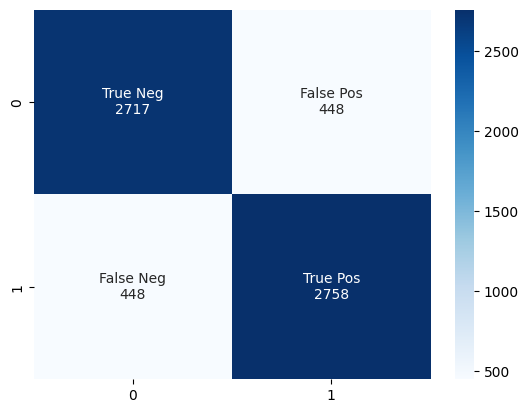

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
Counter(y4)

Counter({1: 7963, 0: 7963})

In [ ]:
cohen_kappa_score(y_test,pred_rf)

0.71871382547928

In [ ]:
accuracy_score(y_test,pred_rf)

0.8593627374038613

In [ ]:

def plot_importances(model,model_name,features_to_plot,feature_name):
  model.fit(X_train,y_train)
  importances = model.feature_importances_

  indices = np.argsort(importances)
  best_features = np.array(feature_names)[indices][-features_to_plot:]
  values = importances[indices][-features_to_plot:]

  y_ticks = np.arange(0, features_to_plot)
  fig, ax = plt.subplots()
  ax.barh(y_ticks, values, color = '#b2c4cc')
  ax.set_yticklabels(best_features)
  ax.set_yticks(y_ticks)
  ax.set_title("%s Feature Importances"%(model_name))
  fig.tight_layout()
  plt.show()
def best_features(model, features_to_plot, feature_names):
    # get list of best features
    model.fit(X,y)
    importances = model.feature_importances_

    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    return best_features

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-153-8af541409347>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(best_features)


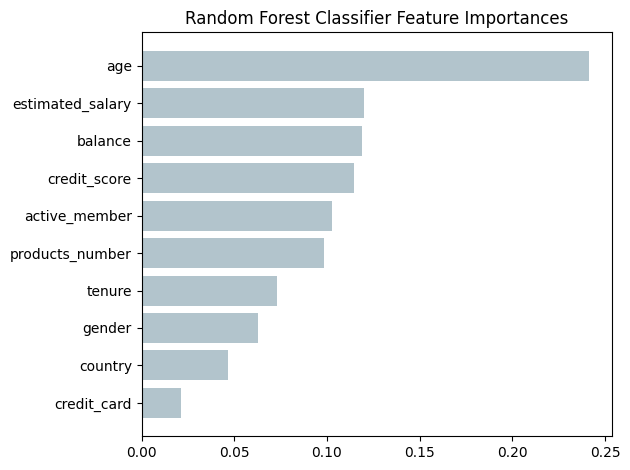

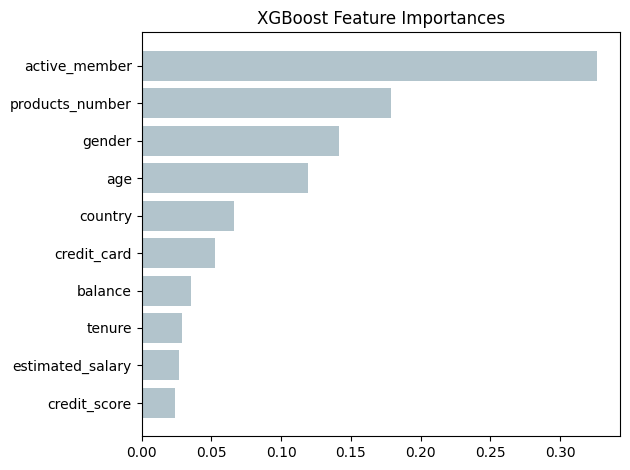

In [ ]:
plot_importances(rf_classifier,'Random Forest Classifier',10,feature_names)
plot_importances(xgbc,'XGBoost',10,feature_names)

In [ ]:
X_train2 = X_train[['products_number','active_member','age','gender','credit_score']]
X_test2 = X_test[['products_number','active_member','age','gender','credit_score']]

In [ ]:
xgbc.fit(X_train2,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_xgbc = xgbc.predict(X_test2)
print(classification_report(y_test,pred_xgbc))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      3165
           1       0.81      0.81      0.81      3206

    accuracy                           0.81      6371
   macro avg       0.81      0.81      0.81      6371
weighted avg       0.81      0.81      0.81      6371



In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
over_sample = ADASYN(random_state = 42)

In [ ]:
X5,y5 = over_sample.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X5,y5,random_state = 42,test_size = 0.3,stratify = y5)

In [ ]:
rf_classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=200)

In [ ]:
pred_rfc = rf_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2389
           1       0.90      0.86      0.88      2391

    accuracy                           0.88      4780
   macro avg       0.88      0.88      0.88      4780
weighted avg       0.88      0.88      0.88      4780



In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cbc = CatBoostClassifier(scale_pos_weight=1)

In [ ]:
cbc.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))

Learning rate set to 0.057492
0:	learn: 0.6490787	test: 0.6490782	best: 0.6490782 (0)	total: 25.5ms	remaining: 25.5s
1:	learn: 0.5952528	test: 0.5964752	best: 0.5964752 (1)	total: 46.4ms	remaining: 23.2s
2:	learn: 0.5547176	test: 0.5559576	best: 0.5559576 (2)	total: 69.8ms	remaining: 23.2s
3:	learn: 0.5288104	test: 0.5300799	best: 0.5300799 (3)	total: 90.8ms	remaining: 22.6s
4:	learn: 0.5096151	test: 0.5115586	best: 0.5115586 (4)	total: 108ms	remaining: 21.6s
5:	learn: 0.4867453	test: 0.4884371	best: 0.4884371 (5)	total: 126ms	remaining: 20.9s
6:	learn: 0.4697757	test: 0.4715476	best: 0.4715476 (6)	total: 146ms	remaining: 20.7s
7:	learn: 0.4478706	test: 0.4503634	best: 0.4503634 (7)	total: 164ms	remaining: 20.3s
8:	learn: 0.4302846	test: 0.4329933	best: 0.4329933 (8)	total: 182ms	remaining: 20.1s
9:	learn: 0.4185614	test: 0.4213246	best: 0.4213246 (9)	total: 205ms	remaining: 20.3s
10:	learn: 0.4045381	test: 0.4077676	best: 0.4077676 (10)	total: 226ms	remaining: 20.3s
11:	learn: 0.39690

In [ ]:
pred_cbc = cbc.predict(X_test)
print(classification_report(y_test,pred_cbc))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2389
           1       0.94      0.88      0.91      2391

    accuracy                           0.91      4780
   macro avg       0.91      0.91      0.91      4780
weighted avg       0.91      0.91      0.91      4780



In [ ]:
X.dtypes

credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
dtype: object

In [ ]:
X['tenure'] = X['tenure'].astype('float64')

In [ ]:
X['age'] = X['age'].astype('float64')

In [ ]:
X['products_number'] = X['products_number'].astype('float64')

In [ ]:
def cat_score(score):
  if 800<=score<=850:
    return 4
  elif 700<=score<800:
    return 3
  elif 600<=score<700:
    return 2
  else:
    return 1

In [ ]:
X['cat_score'] = X['credit_score'].apply(cat_score)

In [ ]:
X.drop(['credit_score'],axis=1,inplace=True)

In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

<ipython-input-230-65eb6c95badc>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X.dtypes != np.float)[0]


In [ ]:
categorical_features_indices

array([0, 1, 6, 7, 9])

In [ ]:
cohen_kappa_score(y_test,pred_cbc)

0.8159043837199673

<Axes: xlabel='churn', ylabel='tenure'>

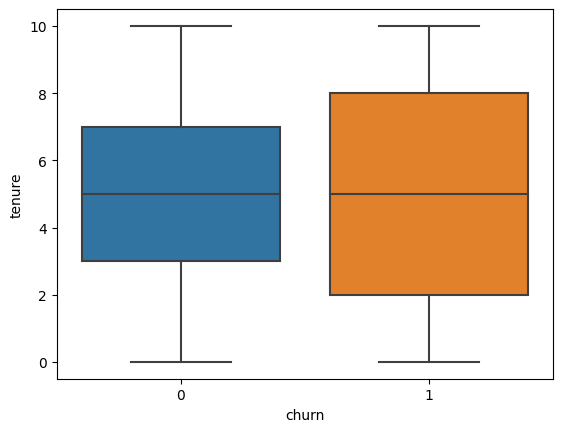

In [ ]:
sns.boxplot(data=df,y='tenure',x='churn')

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [ ]:
pred_lgbm = lgbm.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_lgbm))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2389
           1       0.93      0.87      0.90      2391

    accuracy                           0.90      4780
   macro avg       0.91      0.90      0.90      4780
weighted avg       0.91      0.90      0.90      4780



In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
n_splits=5
kfold = KFold(n_splits = n_splits, shuffle=True, random_state = 1)

In [ ]:
scores_p = []
scores_r =[]
fold = 0

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
for train_idx,val_idx in kfold2.split(X5,y5):
  df_train = X5.iloc[train_idx]
  df_val = X5.iloc[val_idx]

  y_train = y5.iloc[train_idx]
  y_test = y5.iloc[val_idx]
  cbc.fit(df_train,y_train)
  pred_cbc_f = cbc.predict(df_val)
  scores_p.append(precision_score(y_test,pred_cbc_f))
  scores_r.append(recall_score(y_test,pred_cbc_f))
  fold+=1

Streaming output truncated to the last 5000 lines.
4:	learn: 0.5626975	total: 36ms	remaining: 7.16s
5:	learn: 0.5422425	total: 42.4ms	remaining: 7.02s
6:	learn: 0.5277575	total: 48.8ms	remaining: 6.92s
7:	learn: 0.5112426	total: 55.5ms	remaining: 6.88s
8:	learn: 0.4972736	total: 62.4ms	remaining: 6.88s
9:	learn: 0.4889752	total: 69ms	remaining: 6.83s
10:	learn: 0.4764658	total: 75.5ms	remaining: 6.79s
11:	learn: 0.4648936	total: 82ms	remaining: 6.75s
12:	learn: 0.4567845	total: 88.5ms	remaining: 6.72s
13:	learn: 0.4478122	total: 95.3ms	remaining: 6.71s
14:	learn: 0.4402462	total: 102ms	remaining: 6.7s
15:	learn: 0.4332830	total: 109ms	remaining: 6.68s
16:	learn: 0.4246840	total: 116ms	remaining: 6.7s
17:	learn: 0.4183231	total: 122ms	remaining: 6.68s
18:	learn: 0.4139523	total: 129ms	remaining: 6.68s
19:	learn: 0.4066543	total: 136ms	remaining: 6.66s
20:	learn: 0.4021544	total: 143ms	remaining: 6.64s
21:	learn: 0.3975535	total: 149ms	remaining: 6.63s
22:	learn: 0.3929581	total: 156ms	r

In [ ]:
np.mean(scores_p)

0.9363963634163597

In [ ]:
np.mean(scores_r)

0.8770264462533253

In [ ]:
scores_r

[0.8720200752823086,
 0.8782936010037641,
 0.8739021329987453,
 0.8713927227101631,
 0.8907721280602636,
 0.877038895859473,
 0.8682559598494354,
 0.875784190715182,
 0.8833124215809285,
 0.8808030112923463,
 0.8557089084065245,
 0.890840652446675,
 0.8544542032622334,
 0.877038895859473,
 0.9057788944723618]

In [ ]:
kfold2 = StratifiedKFold(n_splits=n_splits*2, shuffle=True,random_state=11)

In [ ]:
fold=0
scores_p_xgbc=[]
scores_r_xgbc = []

In [ ]:
for train_idx,val_idx in kfold2.split(X5,y5):
  df_train = X5.iloc[train_idx]
  df_val = X5.iloc[val_idx]

  y_train = y5.iloc[train_idx]
  y_test = y5.iloc[val_idx]
  xgbc.fit(df_train,y_train)
  pred_xgbc_f = xgbc.predict(df_val)
  scores_p_xgbc.append(precision_score(y_test,pred_xgbc_f))
  scores_r_xgbc.append(recall_score(y_test,pred_xgbc_f))
  fold+=1

In [ ]:
np.mean(scores_p_xgbc)

0.9337858806569214

In [ ]:
np.mean(scores_r_xgbc)

0.8779058403687194

In [ ]:
scores_r_xgbc

[0.877038895859473,
 0.8657465495608532,
 0.8720200752823086,
 0.8808030112923463,
 0.8782936010037641,
 0.8644918444165621,
 0.8971141781681304,
 0.8519447929736512,
 0.8820577164366374,
 0.9095477386934674]